# Laboration 3: Summor av stokastiska variabler och vanliga stickprovsfördelningar
Denna laboration består av tre obligatorisk uppgifter. Den första uppgiften går ut på att simulera summan av oberoende exponentialfördelningar och motivera empiriskt att denna blir gammafördelad. Den andra uppgiften går ut på att motivera empiriskt att summan av väldigt många likafördelade slumpvariabler blir approximativt normalfördelad. Den tredje går ut på att motivera empirskt att summan av kvadrater av oberoende standardiserade normalfördelningar är chi-kvadratfördelad. Huvudsyften med med laborationen är fördjupad kunskap inom sannolikhetsteori samt förberedelse för statistikdelen genom
- att öka förståelsen för viktiga stickprovsfördekningar som gammafördelning, chi-kvadratfördelning och normalfördelning, samt
- att ge empirisk motivering för teoretiska resultat för summor av stokastiska variabler och på så sätt öka förståelsen för dessa. 

## Obligatorisk förberedelse innan laborationen startar
Gå igenom föreläsningsanteckningar för föreläsning 8 och motsvarande avsnitt och uppgifter i kursboken.
## Genomförande
Laborationen genomförs på plats i sal i par eller enskilt. Om man arbetar i par växlar man mellan att vara navigatör och kodare i skift om 10-15 minuter.
## Examination
Laborationen examineras på plats genom att visa upp lösningar och svara på frågor kring lösningarna. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Uppgift 1 (Summan av oberoende exponentialfördelningar)
Uppgiften går ut på att motivera empiriskt att om $X_1, X_2, \dots, X_n$ är inbördes oberoende alla $X_i$ är exponentialfördelade med skalparameter $\beta=1/2$ vilket skrivs $X_i\sim Exp(1/2)$, så är 
$$
X_1+\dots+X_n\sim \text{Gam}(n,1/2)  
$$ 
dvs summan är gammafördelad med formparameter $n$ och skalparameter $\beta=1/2$. Detta skall ni göra för $n=1,2,3,4$ genom simulering med inverssa metoden och jämföra erhållna histogram för samplade stickprov med lämplig täthetsfunktion.

Täthetsfunktionen för Gammafunktionen finns tillgänglig till exempel via ``scipy.stats``. Följande kod ger en plot av en Gamma-PDF
```
    import scipy.stats as ss
    ss.gamma.pdf(x, alpha, 0, 1/beta)
```
Så till exempel för att plotta Gammafunktionen i intervallet ``[0, 10]`` används koden
```
x = np.linspace(0, 10, 100) # genererar 100 värden jämntfördelade i intervallet [0,10]
y = ss.gamma.pdf(x, n, 0, 2) # notera att i scipy är beta inverterat ('rate parameter' i stället för 'scale parameter') så 1/2 blir parametern 2
```

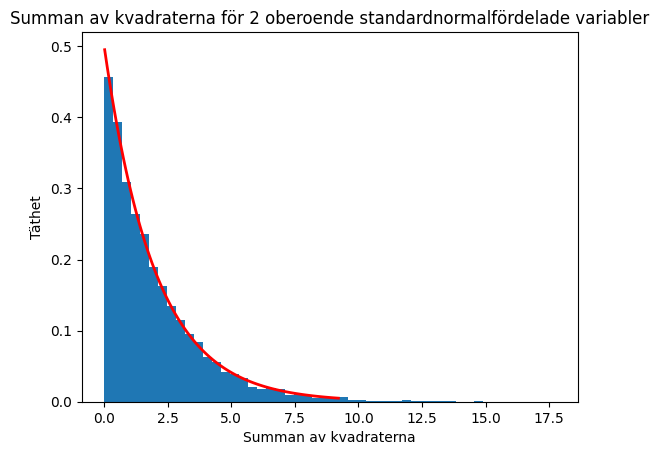

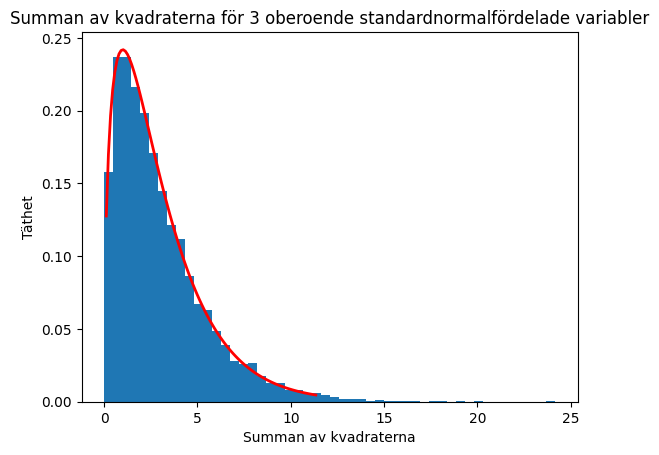

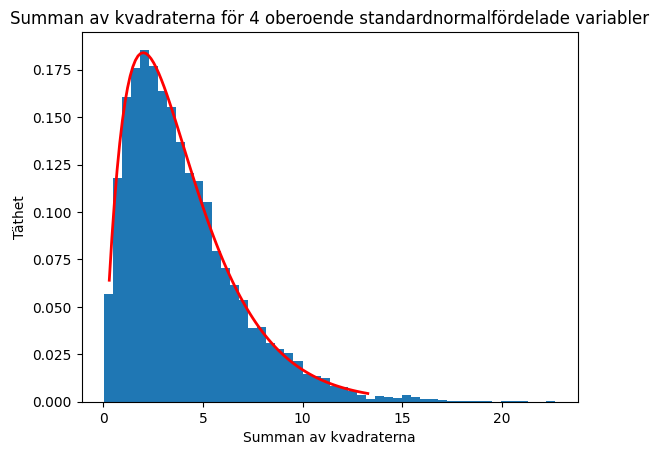

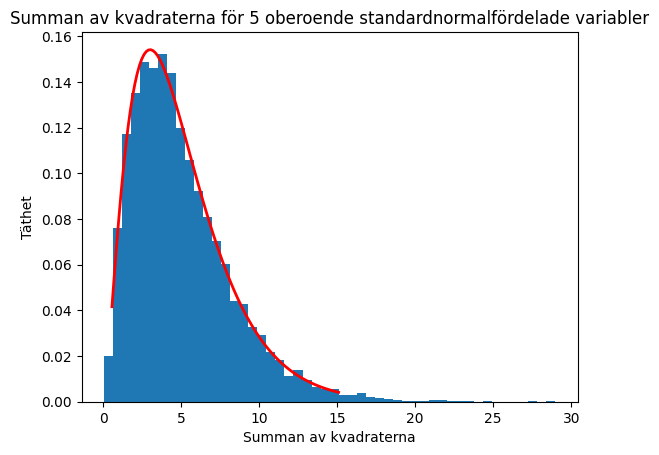

In [2]:
#Testa


# Deluppgift 1.1 (Simulering med inversa metoden av fyra oberoende exponentialfördelningar)

Låt $X_1$, $X_2$, $X_3$ och $X_4$ vara fyra oberoende stokastiska variabler som har alla har samma fördelningsfunktion som en exponentialfördelning med skalparameter $\beta=1/2$.
I denna deluppgift skall ni simulera var och en av dessa $X_i$ med inversa metoden. 
Redovisa resultatet i form av fyra plottar över histogram som ni delar på med hjälp av subplots. I varje subplot skall även motsvarande täthetsfunktion inkluderas.
1. Gör fyra olika histogram med 10000 slumpmässiga samples från vart och ett av dessa $X_i$, där $i=1,2,3,4$. I det första histogrammet ska ni ha 10000 samples från $X_1$, i det andra 10000 samples från $X_2$ osv. Sätt en lämplig titel på varje subplot. Använda inversa metoden genom att använda att $X= F_{X_i}^{-1}(Y)$ där $Y\sim U(0,1)$. Tänk på att alla fyra fördelningar skall vara oberoende. **Hur gör ni för att åstadkomma det?**
2. I varje plot ska ni även inkludera $f_{X_i}(x)$ som en röd streckad plot.
3. Notera att ni måste normalisera era histogram med ``stat = denisty`

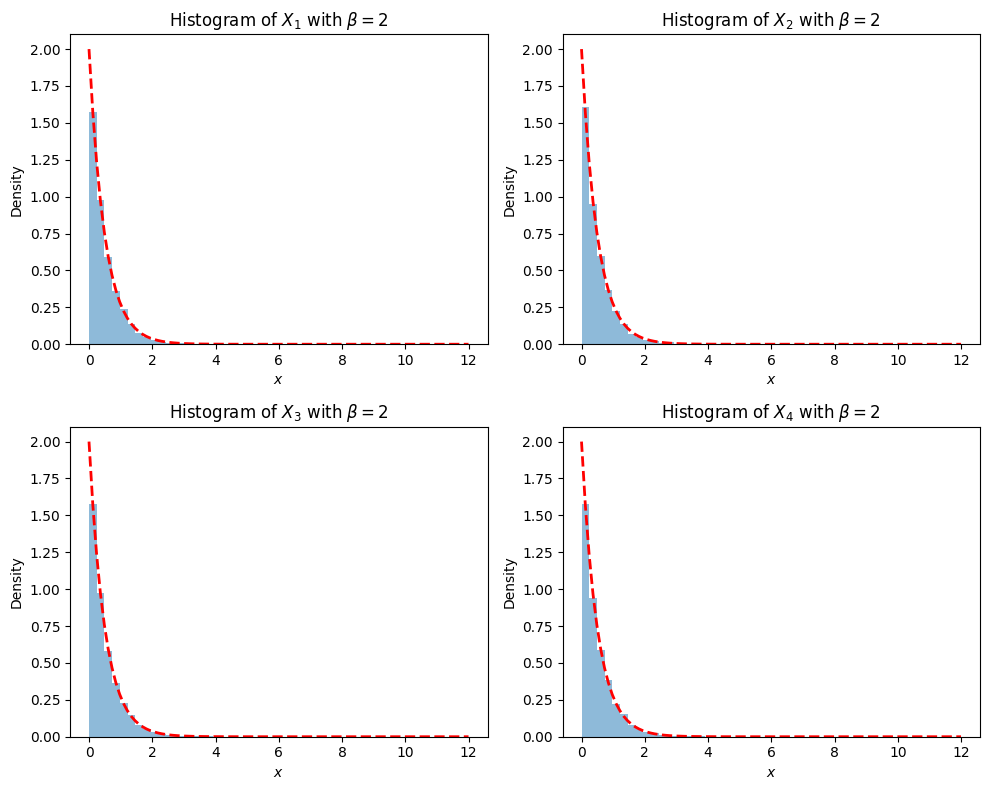

In [3]:
#Fyll på med kod

beta = 2
n = 10000

U1 = np.random.uniform(size=n)
U2 = np.random.uniform(size=n)
U3 = np.random.uniform(size=n)
U4 = np.random.uniform(size=n)

X1 = -np.log(1-U1)/beta
X2 = -np.log(1-U2)/beta
X3 = -np.log(1-U3)/beta
X4 = -np.log(1-U4)/beta

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, X in enumerate([X1, X2, X3, X4]):
    bins = np.linspace(0, 12, 50)
    axs[i].hist(X, bins=bins, density=True, alpha=0.5)
    
    
    x = np.linspace(0, 12, 100)
    f = beta * np.exp(-beta * x)
    axs[i].plot(x, f, 'r--', linewidth=2)
    
    axs[i].set_title(f'Histogram of $X_{i+1}$ with $\\beta={beta}$')
    axs[i].set_xlabel('$x$')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Deluppgift 1.2 (Summan av oberoende exponentialfördelningar) 

I denna uppgift skall ni studera följande summor av de stokastiska variabler ni simulerat i deluppgift 1.1:
$$
Y_1=X_1,\quad Y_2=X_1+X_2, \quad Y_3=X_1+X_2+X_3, \quad Y_4=X_1+X_2+X_3+X_4.
$$
Redovisa resultatet i form av fyra plottar över histogram som ni delar på med hjälp av subplots. I varje subplot skall även motsvarande teoretiska täthetsfunktion inkluderas. Notera att enligt föreläsning så är den teoretiska fördelningen för $Y_i$ en gammafördelning med formparameter $i$ och skalparameter $\beta=1/2$. 
1. Gör fyra olika histogram för vart och ett av dessa $Y_i$ utifrån samplade värden i föregående deluppgift. Sätt en lämplig titel på varje subplot.  
2. I varje subplot ska ni även inkludera motsvarande teoretiska täthetsfunktion, dvs gammafördelning med lämpliga parametrar, som en röd streckad plot.
3. Notera att ni måste normalisera era histogram med ``stat = denisty`

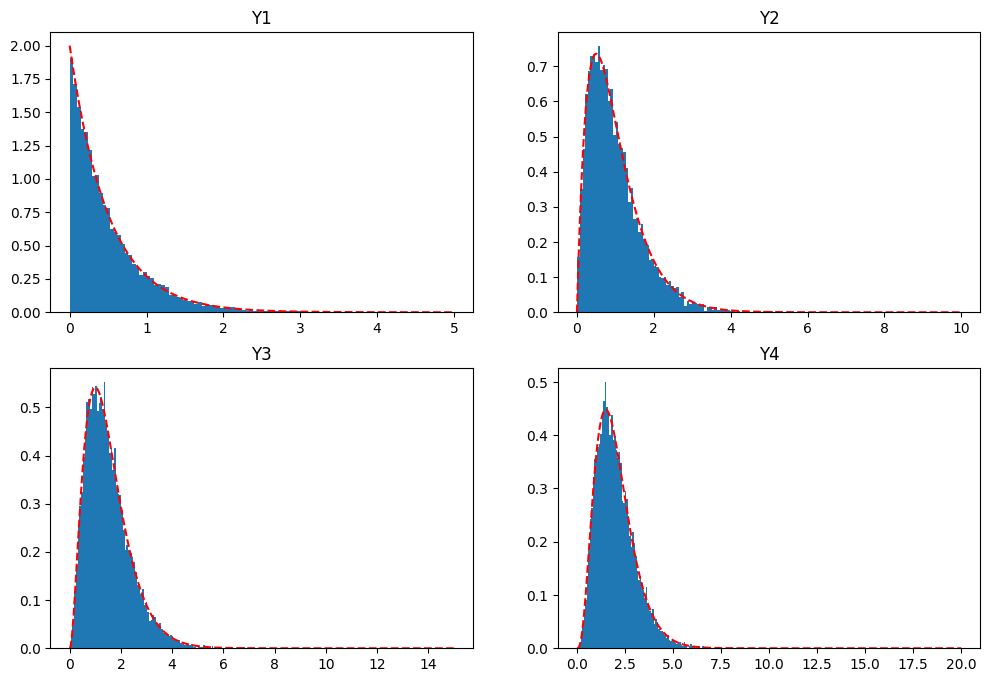

In [4]:
#Fyll på med kod

# Form- och skalfaktorer
form = np.array([1,2,3,4])
skal = 1/2

# Importera X från deluppgift 1.1

# Summera X för att simulera Y
Y1 = X1
Y2 = X1 + X2
Y3 = X1 + X2 + X3
Y4 = X1 + X2 + X3 + X4

# Antal bins och antal samples
bins = 100
samples = 10000

# Skapa histogrammen
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, Y in enumerate([Y1, Y2, Y3, Y4]):
    row = i // 2
    col = i % 2
    axs[row, col].hist(Y, bins=bins, density=True)

    # Plotta den teoretiska täthetsfunktionen
    x = np.linspace(0, form[i]*skal*10, 1000)
    axs[row, col].plot(x, ss.gamma.pdf(x, form[i], scale=skal), 'r--')

    axs[row, col].set_title(f"Y{i+1}")

plt.show()

# Uppgift 2 (Summan av många oberoende likafördelade sv är approximativt normalfördelad)
Uppgiften går ut på att motivera empiriskt att om $X_1, X_2, \dots, X_n$ alla har samma sorts fördelningsfunktion och är inbördes oberoende med med $\mu=E[X_i]$ och $\sigma^2=V[X_i]$ så har vi **approximativt** för stora $n$ att
$$
X_1+\dots+X_n\sim \text{N}(n\mu,n\sigma^2),  
$$ 
dvs summan är approximativt normalfördelad med väntevärde $n\mu$ och varians $n\sigma^2$. Detta skall ni göra för $n=5,10,20$ genom simulering med inversa metoden och jämföra erhållna histogram för samplade stickprov med lämplig täthetsfunktion. Välj fallen då $X_i\sim \text{Exp}(1/2)$ samt fallet då $X_i\sim U(0,1).$ Redovisa resultaten genom lämpliga histogram i kombination med lämplig täthetsfunktion likt deluppgifterna ovan.

Notera att för att generera ett simulerat värde behövs $n=5,10,20$ stycken simulerade värden från de olika fördelningarna. Detta ska sedan upprepas flertalet gånger för att kunna skapa ett histogram.

Precis som för Gammafunktionen i uppgift 1 kan det vara lämpligt att använda ett paket för att plotta täthetsfunktionen för en normalfördelning. På samma sätt som med Gammafunktionen så ges den bland annat av ``scipy.stats``. Normalfördelningen ges av ``ss.norm(x, mu, sigma)``.

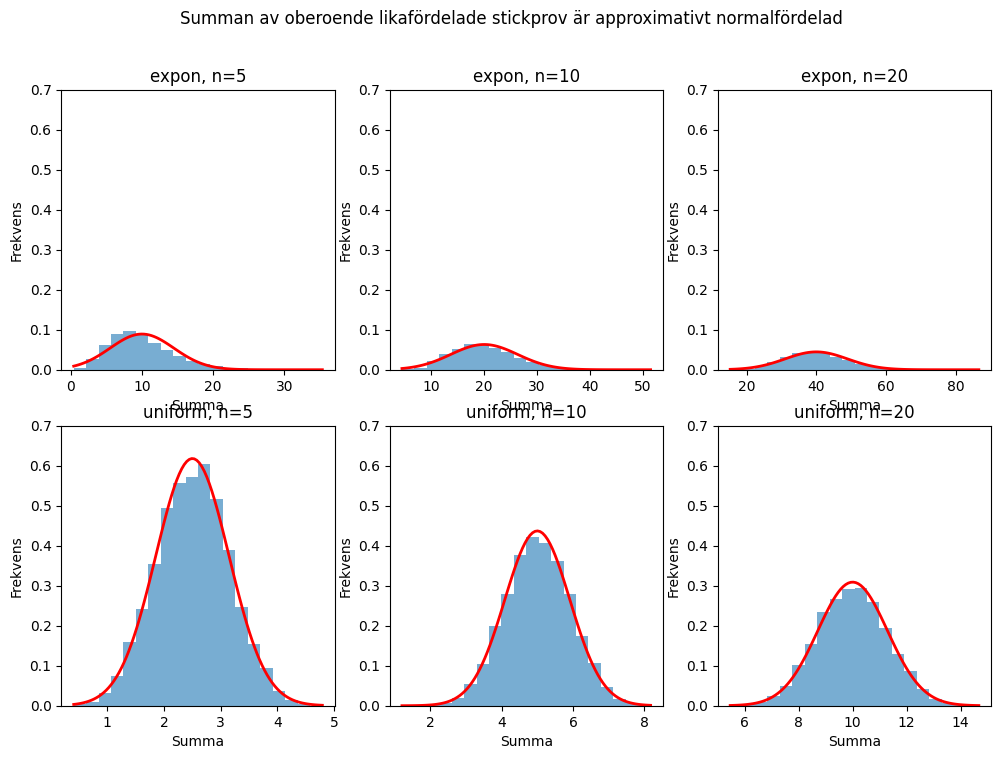

In [5]:
#Fyll på med kod

# Funktion för att generera simulerade stickprov
def generate_samples(distribution, n, size):
    """
    distribution: en funktion som genererar slumpmässiga tal från en viss fördelning
    n: antal slumpmässiga tal att generera för varje stickprov
    size: antal stickprov att generera
    """
    return np.array([distribution.rvs(size=n) for _ in range(size)])

# Funktion för att plotta histogram och normalfördelning
def plot_histogram(ax, samples, mu, sigma):
    """
    ax: en instans av en Matplotlib AxesSubplot där histogrammet ska ritas
    samples: stickprov som histogrammet ska byggas från
    mu: väntevärde för normalfördelningen
    sigma: standardavvikelse för normalfördelningen
    """
    # Rita histogrammet
    ax.hist(samples, bins=20, density=True, alpha=0.6)

    # Rita normalfördelningen
    x = np.linspace(samples.min(), samples.max(), 100)
    y = ss.norm.pdf(x, mu, sigma)
    ax.plot(x, y, 'r-', linewidth=2)

# Skapa en figur med subplots för alla fördelningar och stickprovstorlekar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Fördelningar att testa
distributions = [
    ss.expon(scale=2),  # Exponentialfördelning med lambda=1/2
    ss.uniform(0, 1)    # Jämnt fördelade tal mellan 0 och 1
]

# Stickprovstorlekar att testa
ns = [5, 10, 20]

# Iterera över alla fördelningar och stickprovstorlekar
for i, distribution in enumerate(distributions):
    for j, n in enumerate(ns):
        # Generera stickprov
        samples = generate_samples(distribution, n, size=10000)

        # Beräkna medelvärde och standardavvikelse för summan av stickproven
        mu_sum = n * distribution.mean()
        var_sum = n * distribution.var()
        sigma_sum = np.sqrt(var_sum)

        # Plotta histogram och normalfördelning
        plot_histogram(axs[i, j], samples.sum(axis=1), mu_sum, sigma_sum)

        # Sätt titlar och label på plot
        axs[i, j].set_title(f'{distribution.dist.name}, n={n}')
        axs[i, j].set_xlabel('Summa')
        axs[i, j].set_ylabel('Frekvens')

# Ställ in y-axeln så att alla subplots har samma skala
for ax in axs.flatten():
    ax.set_ylim([0, 0.7])

# Sätt titel på hela figuren
fig.suptitle('Summan av oberoende likafördelade stickprov är approximativt normalfördelad')

# Visa figuren
plt.show()

**Uppgift 2 fortsättning.** Gör samma som ovan förutom att ni i stället tar fram empisriskt stöd för att **approximativt** för stora $n$ är
$$
\overline{X}=\frac{X_1+\dots+X_n}{n}\sim \text{N}(\mu,\frac{\sigma^2}{n}),  
$$ 
dvs **medelvärdet** av summan är approximativt normalfördelad med väntevärde $\mu$ och varians $\sigma^2/n$.

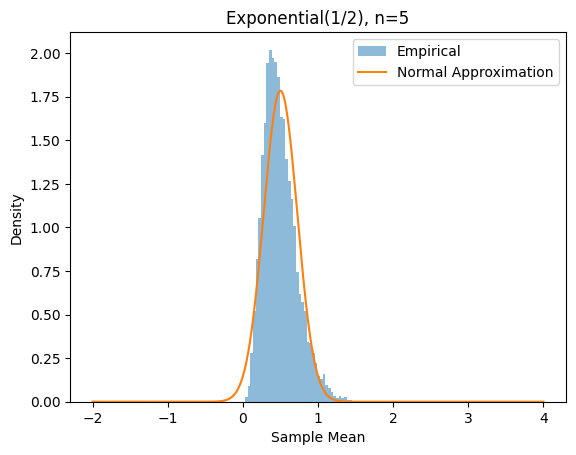

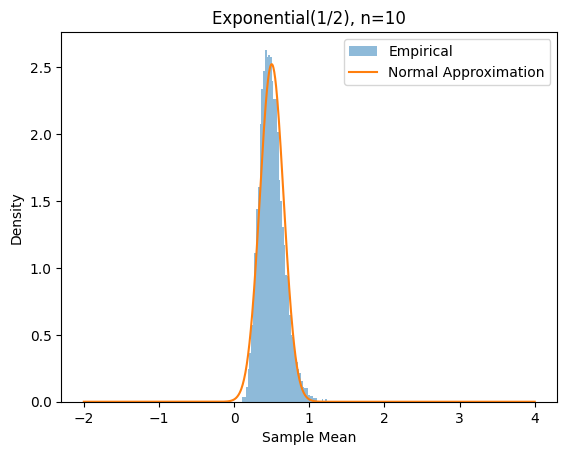

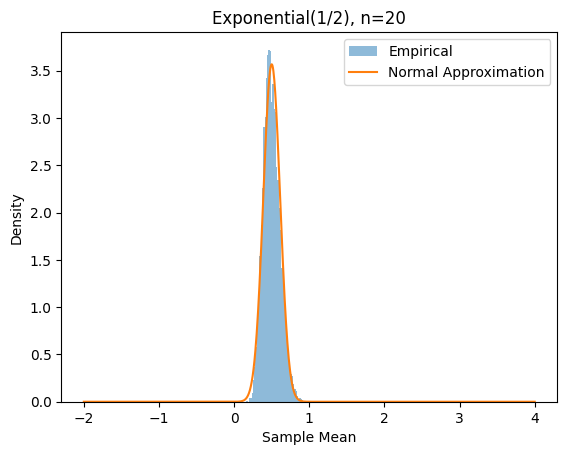

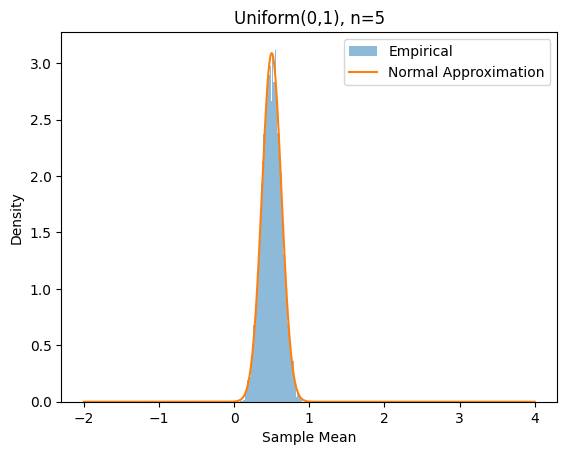

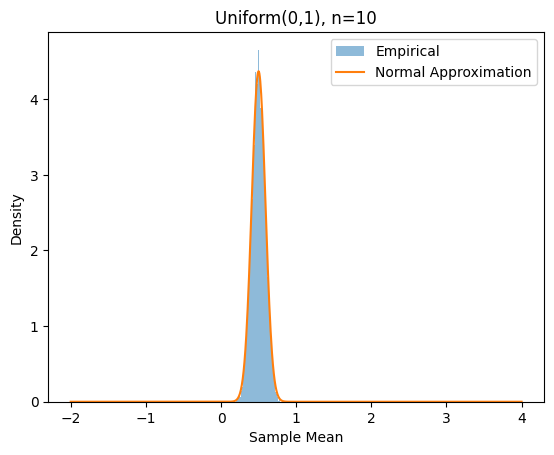

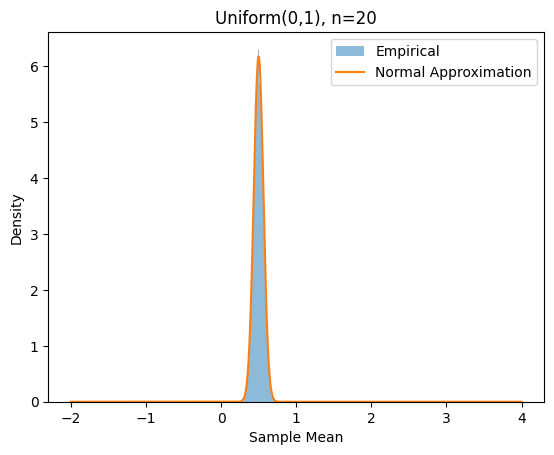

In [6]:
#Fyll på med kod. 

# Define the sample size
n_vals = [5, 10, 20]

# Define the distributions
distributions = [
    {
        "name": "Exponential(1/2)",
        "dist": ss.expon(scale=1/2),
        "mu": 1/2,
        "sigma": np.sqrt(1/4)
    },
    {
        "name": "Uniform(0,1)",
        "dist": ss.uniform(loc=0, scale=1),
        "mu": 1/2,
        "sigma": np.sqrt(1/12)
    }
]

# Define the number of trials
num_trials = 10000

# Define the number of bins for the histograms
num_bins = 50

# Define the x-axis values
x = np.linspace(-2, 4, 1000)

# Loop over the distributions
for dist in distributions:

    # Loop over the sample sizes
    for n in n_vals:

        # Generate the samples
        samples = [dist["dist"].rvs(size=n) for i in range(num_trials)]

        # Compute the sample means
        sample_means = [np.mean(sample) for sample in samples]

        # Compute the theoretical mean and standard deviation of the sample mean
        mu_mean = dist["mu"]
        sigma_mean = np.sqrt(dist["sigma"]**2 / n)

        # Compute the theoretical normal distribution
        norm_dist = ss.norm(mu_mean, sigma_mean)

        # Plot the histogram
        plt.hist(sample_means, bins=num_bins, density=True, alpha=0.5, label="Empirical")

        # Plot the theoretical normal distribution
        plt.plot(x, norm_dist.pdf(x), label="Normal Approximation")

        # Set the title and labels
        plt.title(f"{dist['name']}, n={n}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")

        # Set the legend
        plt.legend()

        # Show the plot
        plt.show()

# Uppgift 3 (Summan av kvadrater av oberoende likafördelade standardiserade normalfördelningar är chi-kvadratfördelad)
Uppgiften går ut på att motivera empirskt att om $Z_1, Z_2, \dots, Z_n$ alla har fördelning motsvarande standardiserad normalfördelning $\text{N}(0,1)$ och är inbördes oberoende så är 
$$
Z_1^2+Z_2^2+\dots+Z_n^2\sim \chi^2(n)
$$ 
dvs summan är chi-kvadratfördelad med $n$ stycken frihetsgrader (a chi-squared distribution with $n$ degrees of freedom). Detta skall ni göra för $n=2,3,4,5$ genom simulering utgående från $N(0,1)$ och jämföra erhållna histogram för samplade stickprov med lämplig täthetsfunktion. Redovisa resultaten genom lämpliga histogram i kombination med lämplig täthetsfunktion likt deluppgifterna ovan.

För att erhålla simuleringar från $N(0,1)$ kan ni lämpligen använda kommandot ``np.random.randn(n)``, där $n$ anger hur stort sample ni önskar få.

Liten kodhjälp för att simulera, t.ex. $Z_1^2 + Z_2^2$ är ``np.sum(np.power(np.random.randn(2),2))``


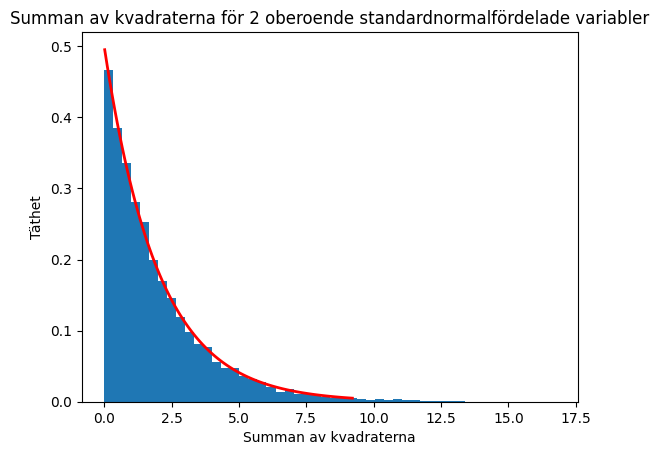

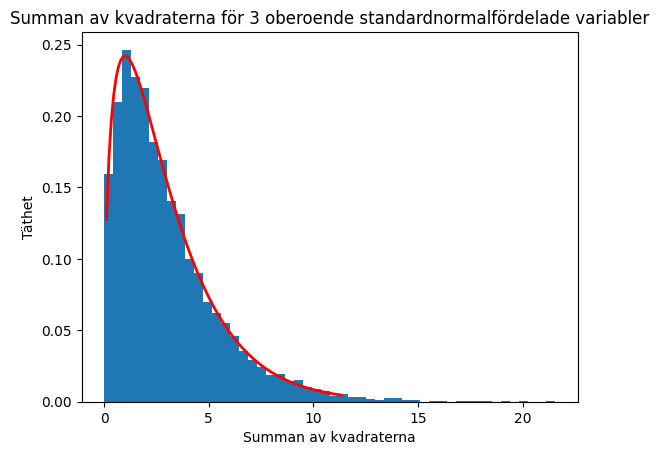

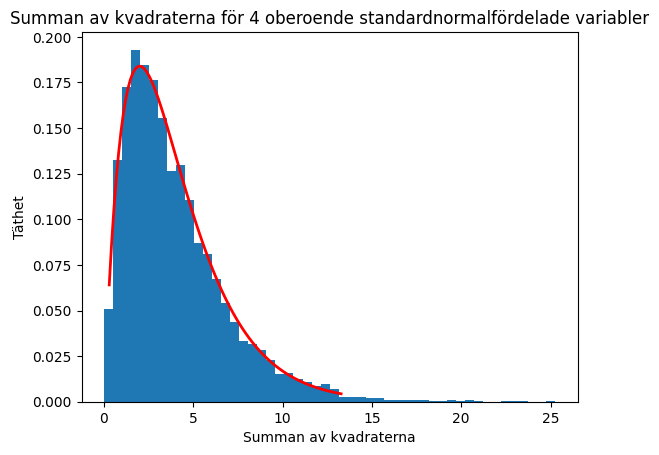

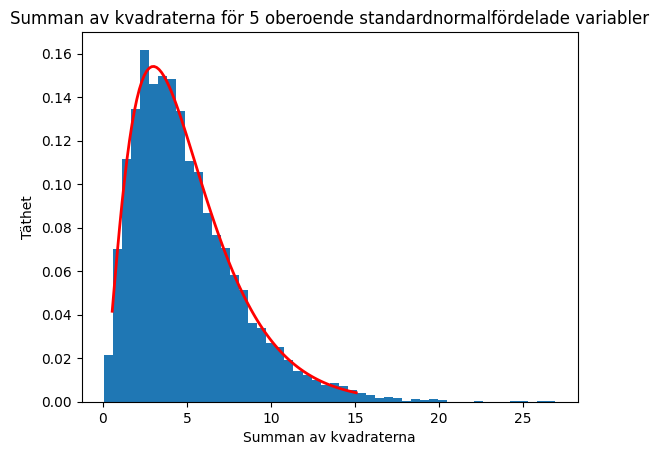

In [3]:
#Fyll på med kod. 

# Antal frihetsgrader
ns = [2, 3, 4, 5]

# Antal stickprov
N = 10000

# Simulera och beräkna summan av kvadraterna för varje stickprov
sums = {}
for n in ns:
    sums[n] = [np.sum(np.power(np.random.randn(n), 2)) for i in range(N)]

# Plotta histogram och chi-kvadratfördelningens täthetsfunktion för varje n
for n in ns:
    plt.figure()
    plt.hist(sums[n], bins=50, density=True)
    x = np.linspace(ss.chi2.ppf(0.01, n), ss.chi2.ppf(0.99, n), 100)
    plt.plot(x, ss.chi2.pdf(x, n), 'r-', lw=2)
    plt.title('Summan av kvadraterna för ' + str(n) + ' oberoende standardnormalfördelade variabler')
    plt.xlabel('Summan av kvadraterna')
    plt.ylabel('Täthet')
    plt.show()

# Lycka till!